In [1]:
%run first_analysis.py

Uns bleiben 115 Rezepte mit diesen Zutaten:
[u'amaretto' u'blended whiskey' u'blue curacao' u'bourbon' u'brandy'
 u'carbonated water' u'champagne' u'cherry' u'club soda' u'coca-cola'
 u'coffee' u'creme de cacao' u'creme de cassis' u'dark rum'
 u'dry vermouth' u'egg white' u'gin' u'ginger ale' u'grenadine' u'ice'
 u'kahlua' u'lemon' u'lemon juice' u'lemon peel' u'lemon-lime soda'
 u'lemonade' u'light cream' u'light rum' u'lime' u'lime juice'
 u'maraschino cherry' u'milk' u'mint' u'nutmeg' u'orange' u'orange juice'
 u'pineapple juice' u'powdered sugar' u'red wine' u'rum' u'soda water'
 u'sour mix' u'sugar' u'sugar syrup' u'sweet vermouth' u'tequila'
 u'triple sec' u'vodka' u'water']


In [2]:
from sklearn.manifold import LocallyLinearEmbedding, MDS, TSNE

masked_recipes = mask_cocktails(reduced_ingredients[-30], ingredients_vector)
masked_recipes2 = masked_recipes[~masked_recipes.mask.all(axis=1)][:,~masked_recipes.mask.all(axis=0)]
selected_recipes = np.logical_not(masked_recipes.mask.all(axis=1))
recipe_names = drinks['strDrink'].iloc[selected_recipes].values
recipes_to_track = ['Margarita', 'Mojito', 'Cuba Libre', 'Tequila Sunrise', 'Long Island Iced Tea']
recipe_idx = [np.where(recipe_names==recipe)[0] for recipe in recipes_to_track]
selected_ingredient_names = mlb.classes_[~masked_recipes.mask.all(axis=0)]

In [60]:
from sklearn.decomposition import NMF, PCA, KernelPCA, DictionaryLearning
nmf = PCA(n_components=10)
nmf_comps = nmf.fit_transform(masked_recipes2)

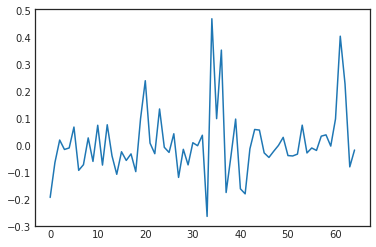

In [290]:
plt.plot(nmf.components_[])

In [3]:
ingredients_to_track = ['vodka', 'gin']
alc_idx = [np.where(mlb.classes_==ingr)[0] for ingr in ingredients_to_track]

colors = [{0:'g',1:'r',2:'b'}[np.where(masked_recipes[i,alc_idx])[0][0]] if masked_recipes[i,alc_idx].any() else 'y' for i in range(masked_recipes[~masked_recipes.mask.all(axis=1)].shape[0])] 

In [4]:
tsne = TSNE(n_components=2, early_exaggeration=20, perplexity=5, init='pca', random_state=1)
comps = tsne.fit_transform(masked_recipes2)

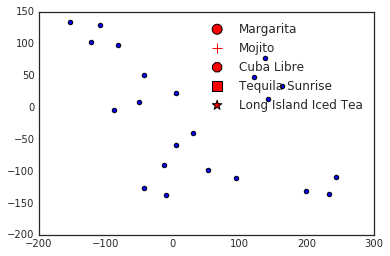

In [58]:
plt.scatter(comps[:,0], comps[:,1])
symbols = ['o', '+', '8', 's', '*']
for i, (idx, recipe) in enumerate(zip(recipe_idx, recipes_to_track)):
    plt.scatter(comps[idx,0], comps[idx,1], marker=symbols[i], s=100, label=recipe, c='r')
plt.legend()

In [5]:
import bokeh.plotting as bpl

bpl.output_file("drinksss.html")

source = bpl.ColumnDataSource(data=dict(
    x=comps[:,0],
    y=comps[:,1],
    desc=recipe_names,
    ingredients=['<br/>'.join(mlb.classes_[np.where(rec)]) for rec in masked_recipes[~masked_recipes.mask.all(axis=1)]]
))

TOOLTIPS = [
#    ("index", "$index"),
#    ("(x,y)", "($x, $y)"),
    ("Cocktail", "@desc"),
    ("Ingredients", "@ingredients{safe}")
]
p = bpl.figure(tools="reset,pan,wheel_zoom", tooltips=TOOLTIPS,
           title="Mouse over the dots")

p.scatter('x', 'y', marker='o', size=10, source=source)
bpl.show(p)

AttributeError: unexpected attribute 'tooltips' to Figure, possible attributes are above, aspect_scale, background_fill_alpha, background_fill_color, below, border_fill_alpha, border_fill_color, css_classes, disabled, extra_x_ranges, extra_y_ranges, h_symmetry, height, hidpi, inner_height, inner_width, js_event_callbacks, js_property_callbacks, layout_height, layout_width, left, lod_factor, lod_interval, lod_threshold, lod_timeout, match_aspect, min_border, min_border_bottom, min_border_left, min_border_right, min_border_top, name, outline_line_alpha, outline_line_cap, outline_line_color, outline_line_dash, outline_line_dash_offset, outline_line_join, outline_line_width, output_backend, plot_height, plot_width, renderers, right, sizing_mode, subscribed_events, tags, title, title_location, toolbar, toolbar_location, toolbar_sticky, v_symmetry, width, x_range, x_scale, y_range or y_scale